In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import time

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import re
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
# Clean dataset
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
url = 'https://raw.githubusercontent.com/dashascience/-MBTI-Myers-Briggs-Personality-Type-Dataset/master/mbti_1.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [5]:
# checking the types of varibles in the dataset(int,float,object) and also looking at null values
dtypes=pd.DataFrame(df.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=df.nunique()
dtypes["Null Values"]=df.isnull().sum()
dtypes["% null Values"]=df.isnull().sum()/len(df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
type,object,16,0,0.000000
posts,object,8675,0,0.000000


In [6]:
# normalize, remove stop words and url links.
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
clean_text1=[]
for i in df.posts[0].split('|||'):
  i=i.lower()
  i = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", i)
  i_tokens = word_tokenize(i)
  filtered_i = [w for w in i_tokens if not w in stop_words]
  clean_text1.append(filtered_i)
  print(filtered_i)


[]
[]
['enfp', 'intj', 'moments', 'sportscenter', 'top', 'ten', 'plays', 'pranks']
['lifechanging', 'experience', 'life']
['repeat', 'today']
['may', 'perc', 'experience', 'immerse']
['last', 'thing', 'infj', 'friend', 'posted', 'facebook', 'committing', 'suicide', 'next', 'day', 'rest', 'peace']
['hello', 'enfj7', 'sorry', 'hear', 'distress', 'natural', 'relationship', 'perfection', 'time', 'every', 'moment', 'existence', 'try', 'figure', 'hard', 'times', 'times', 'growth']
['84389', '84390']
['welcome', 'stuff']
['game', 'set', 'match']
['prozac', 'wellbrutin', 'least', 'thirty', 'minutes', 'moving', 'legs', 'dont', 'mean', 'moving', 'sitting', 'desk', 'chair', 'weed', 'moderation', 'maybe', 'try', 'edibles', 'healthier', 'alternative']
['basically', 'come', 'three', 'items', 'youve', 'determined', 'type', 'whichever', 'types', 'want', 'would', 'likely', 'use', 'given', 'types', 'cognitive', 'functions', 'whatnot', 'left']
['things', 'moderation', 'sims', 'indeed', 'video', 'game', '

In [7]:
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
mbti = ["intj","intp","infj", "infp","istj","istp","isfj","isfp","entj","entp", "enfj", "enfp","estj", "estp","esfj","esfp","si","ni","ti","fi","se",
        "ne","te","fe","nt","nf","le","mbti","sp","sj","sf","st","in","is","en","es"]
data_length=[]
lemmatizer=WordNetLemmatizer()
clean_text1=[]
for i in range(0,len(df.posts)):
  doc = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", df.posts[i])
  doc = doc.lower()
  doc = doc.split()
  doc = [word for word in doc if not word in mbti]
  doc = [lemmatizer.lemmatize(word) for word in doc if not word in set(stopwords)]
  doc = ' '.join(doc)
  clean_text1.append(doc)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
types = np.unique(df.type.values)

def get_type_index(string):
    return list(types).index(string)

df['type_index'] = df['type'].apply(get_type_index)
# Find the original posts column
n = df.columns[1]

# Drop that column
df.drop(n, axis = 1, inplace = True)

# Put cleaned posts in place
df[n] = clean_text1

In [9]:
df['tokenized_cleantexts'] = df.apply(lambda row: nltk.word_tokenize(row['posts']), axis=1)

In [10]:
df

,type,type_index,posts,tokenized_cleantexts
0,INFJ,8,moment sportscenter top ten play prankswhat li...,"[moment, sportscenter, top, ten, play, pranksw..."
1,ENTP,3,im finding lack post alarmingsex boring positi...,"[im, finding, lack, post, alarmingsex, boring,..."
2,INTP,11,good one course say know thats blessing cursed...,"[good, one, course, say, know, thats, blessing..."
3,INTJ,10,dear enjoyed conversation day esoteric gabbing...,"[dear, enjoyed, conversation, day, esoteric, g..."
4,ENTJ,2,youre firedthats another silly misconception a...,"[youre, firedthats, another, silly, misconcept..."
...,...,...,...,...
8670,ISFP,13,always think cat doms reason website become ne...,"[always, think, cat, doms, reason, website, be..."
8671,ENFP,1,soif thread already exists someplace else heck...,"[soif, thread, already, exists, someplace, els..."
8672,INTP,11,many question thing would take purple pill pic...,"[many, question, thing, would, take, purple, p..."
8673,INFP,9,conflicted right come wanting child honestly m...,"[conflicted, right, come, wanting, child, hone..."


In [11]:
#Shows posts by group, we can see that the distribution is unbalanced
#ESTJ has the lowest number of posts which is 39
print(df.groupby(['type']).count().mean())
print(df.groupby(['type']).count())

type_index              542.1875
posts                   542.1875
tokenized_cleantexts    542.1875
dtype: float64
      type_index  posts  tokenized_cleantexts
type                                         
ENFJ         190    190                   190
ENFP         675    675                   675
ENTJ         231    231                   231
ENTP         685    685                   685
ESFJ          42     42                    42
ESFP          48     48                    48
ESTJ          39     39                    39
ESTP          89     89                    89
INFJ        1470   1470                  1470
INFP        1832   1832                  1832
INTJ        1091   1091                  1091
INTP        1304   1304                  1304
ISFJ         166    166                   166
ISFP         271    271                   271
ISTJ         205    205                   205
ISTP         337    337                   337


In [12]:
temp_list=[]
for i in df.type:
  temp=[]
  if i[0]=='I':
    temp.append(1)
  else:
    temp.append(0)

  if i[1]=='S':
    temp.append(1)
  else:
    temp.append(0)

  if i[2]=='T':
    temp.append(1)
  else:
    temp.append(0)

  if i[3]=='P':
    temp.append(1)
  else:
    temp.append(0)

  temp_list.append(temp)

In [13]:
TempDF=pd.DataFrame(temp_list)
TempDF.columns=['I/E','S/N','T/F','P/J']
final_df = pd.concat([df, TempDF], axis=1)

In [14]:
final_df.head()

,type,type_index,posts,tokenized_cleantexts,I/E,S/N,T/F,P/J
0,INFJ,8,moment sportscenter top ten play prankswhat li...,"[moment, sportscenter, top, ten, play, pranksw...",1,0,0,0
1,ENTP,3,im finding lack post alarmingsex boring positi...,"[im, finding, lack, post, alarmingsex, boring,...",0,0,1,1
2,INTP,11,good one course say know thats blessing cursed...,"[good, one, course, say, know, thats, blessing...",1,0,1,1
3,INTJ,10,dear enjoyed conversation day esoteric gabbing...,"[dear, enjoyed, conversation, day, esoteric, g...",1,0,1,0
4,ENTJ,2,youre firedthats another silly misconception a...,"[youre, firedthats, another, silly, misconcept...",0,0,1,0


In [22]:
# Stratify split to ensure equal distribution of data
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(final_df,test_size=0.2,random_state=42,stratify=final_df.type)

In [23]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.posts)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x7f5d6d4e5640>)

In [25]:
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [26]:
train_post.shape

(6940, 5000)

In [29]:
train_targetIE=train_data['I/E']
test_targetIE=test_data['I/E']
train_targetSN=train_data['S/N']
test_targetSN=test_data['S/N']
train_targetTF=train_data['T/F']
test_targetTF=test_data['T/F']
train_targetPJ=train_data['P/J']
test_targetPJ=test_data['P/J']

In [36]:
#machine learning model_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

# I/E classification

In [37]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
model_list=['Logistic Regression','SVW','KNN','Decision Tree','Random Forest','Naive Bayes']
acc_IElist=[]
auc_IElist = []
cm_IElist=[]
for model in model_pipeline:
  model.fit(train_post, train_targetIE)
  y_afterpred = model.predict(test_post)
  acc_IElist.append(metrics.accuracy_score(test_targetIE, y_afterpred))
  fpr, tpr,thresholds = metrics.roc_curve(test_targetIE,y_afterpred)
  auc_IElist.append(round(metrics.auc(fpr, tpr),2))
  cm_IElist.append(confusion_matrix(test_targetIE, y_afterpred))

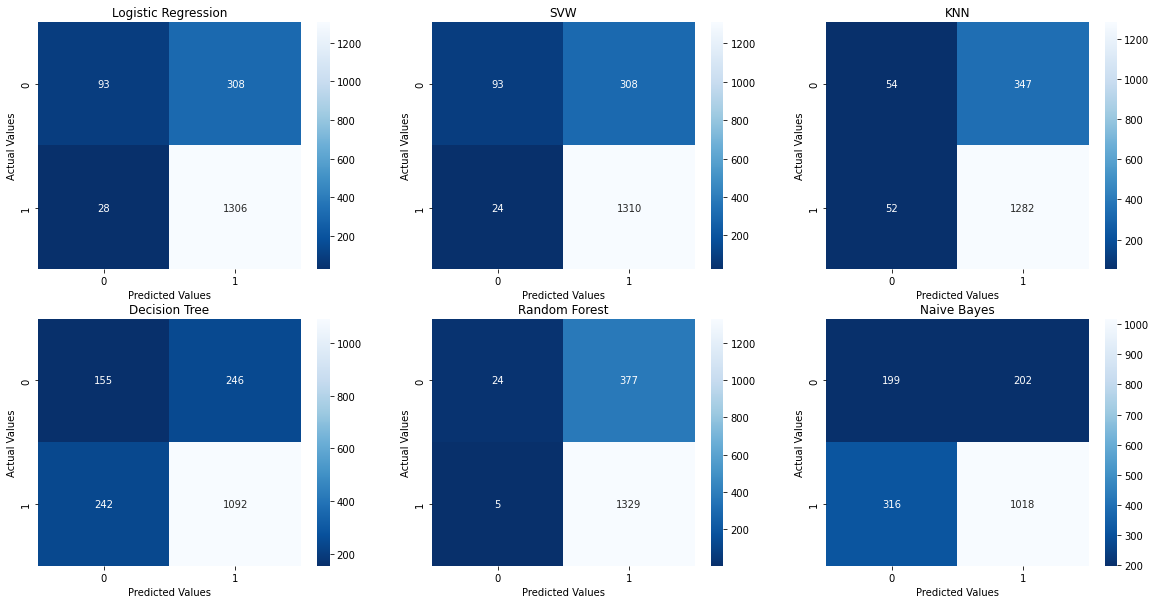

In [38]:
#plot confusion matrix
fig = plt.figure(figsize = ( 20,10))
for i in range( len(cm_IElist)) :
  cm = cm_IElist[i]
  model = model_list[i]
  sub = fig.add_subplot(2,3,i+1).set_title(model)
  cm_plot = sns.heatmap(cm,annot=True,cmap = "Blues_r",fmt='g')
  cm_plot.set_xlabel('Predicted Values')
  cm_plot.set_ylabel('Actual Values')


In [39]:
#accuracy and AUC
resultIE_df = pd.DataFrame({'Model' :model_list,'Accuracy' : acc_IElist,'AUC' : auc_IElist})
resultIE_df

,Model,Accuracy,AUC
0,Logistic Regression,0.806340,0.61
1,SVW,0.808646,0.61
2,KNN,0.770029,0.55
3,Decision Tree,0.718732,0.60
4,Random Forest,0.779827,0.53
5,Naive Bayes,0.701441,0.63


# S/N Classification

In [40]:
acc_SNlist=[]
auc_SNlist = []
cm_SNlist=[]
for model in model_pipeline:
  model.fit(train_post, train_targetSN)
  y_afterpred = model.predict(test_post)
  acc_SNlist.append(metrics.accuracy_score(test_targetSN, y_afterpred))
  fpr, tpr,thresholds = metrics.roc_curve(test_targetSN,y_afterpred)
  auc_SNlist.append(round(metrics.auc(fpr, tpr),2))
  cm_SNlist.append(confusion_matrix(test_targetSN, y_afterpred))

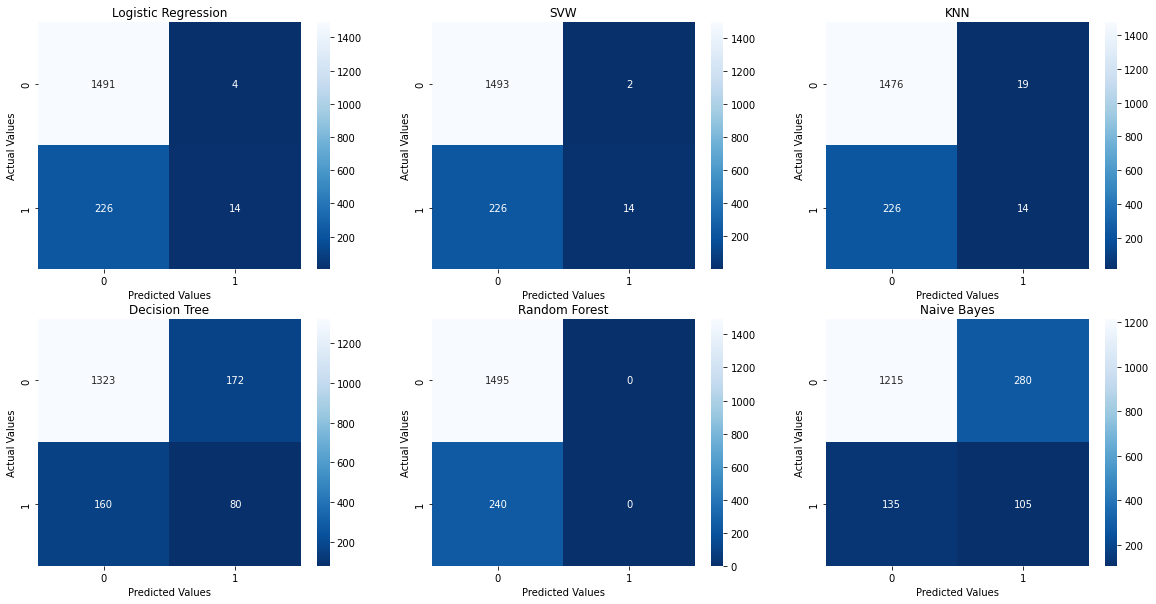

In [41]:
#plot confusion matrix
fig = plt.figure(figsize = ( 20,10))
for i in range( len(cm_SNlist)) :
  cm = cm_SNlist[i]
  model = model_list[i]
  sub = fig.add_subplot(2,3,i+1).set_title(model)
  cm_plot = sns.heatmap(cm,annot=True,cmap = "Blues_r",fmt='g')
  cm_plot.set_xlabel('Predicted Values')
  cm_plot.set_ylabel('Actual Values')

In [42]:
#accuracy and AUC
resultSN_df = pd.DataFrame({'Model' :model_list,'Accuracy' : acc_SNlist,'AUC' : auc_SNlist})
resultSN_df

,Model,Accuracy,AUC
0,Logistic Regression,0.867435,0.53
1,SVW,0.868588,0.53
2,KNN,0.858790,0.52
3,Decision Tree,0.808646,0.61
4,Random Forest,0.861671,0.50
5,Naive Bayes,0.760807,0.63


# T/F Classification

In [43]:
acc_TFlist=[]
auc_TFlist = []
cm_TFlist=[]
for model in model_pipeline:
  model.fit(train_post, train_targetTF)
  y_afterpred = model.predict(test_post)
  acc_TFlist.append(metrics.accuracy_score(test_targetTF, y_afterpred))
  fpr, tpr,thresholds = metrics.roc_curve(test_targetTF,y_afterpred)
  auc_TFlist.append(round(metrics.auc(fpr, tpr),2))
  cm_TFlist.append(confusion_matrix(test_targetTF, y_afterpred))

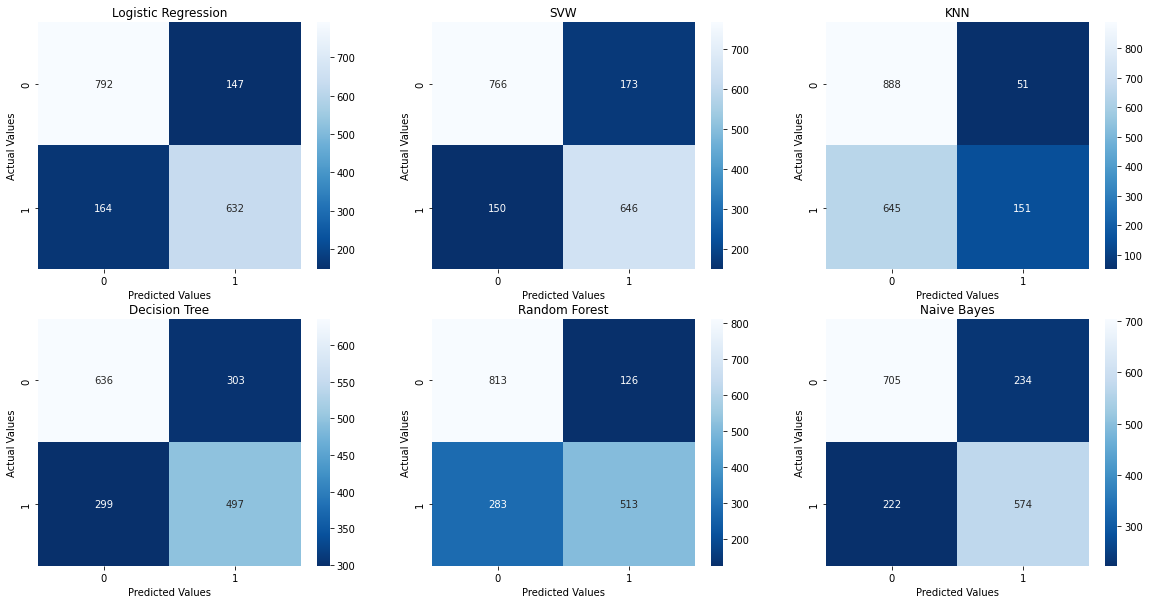

In [44]:
#plot confusion matrix
fig = plt.figure(figsize = ( 20,10))
for i in range( len(cm_TFlist)) :
  cm = cm_TFlist[i]
  model = model_list[i]
  sub = fig.add_subplot(2,3,i+1).set_title(model)
  cm_plot = sns.heatmap(cm,annot=True,cmap = "Blues_r",fmt='g')
  cm_plot.set_xlabel('Predicted Values')
  cm_plot.set_ylabel('Actual Values')

In [45]:
#accuracy and AUC
resultTF_df = pd.DataFrame({'Model' :model_list,'Accuracy' : acc_TFlist,'AUC' : auc_TFlist})
resultTF_df

,Model,Accuracy,AUC
0,Logistic Regression,0.820749,0.82
1,SVW,0.813833,0.81
2,KNN,0.598847,0.57
3,Decision Tree,0.653026,0.65
4,Random Forest,0.764265,0.76
5,Naive Bayes,0.737176,0.74


# P/J Classification

In [46]:
acc_PJlist=[]
auc_PJlist = []
cm_PJlist=[]
for model in model_pipeline:
  model.fit(train_post, train_targetPJ)
  y_afterpred = model.predict(test_post)
  acc_PJlist.append(metrics.accuracy_score(test_targetPJ, y_afterpred))
  fpr, tpr,thresholds = metrics.roc_curve(test_targetPJ,y_afterpred)
  auc_PJlist.append(round(metrics.auc(fpr, tpr),2))
  cm_PJlist.append(confusion_matrix(test_targetPJ, y_afterpred))

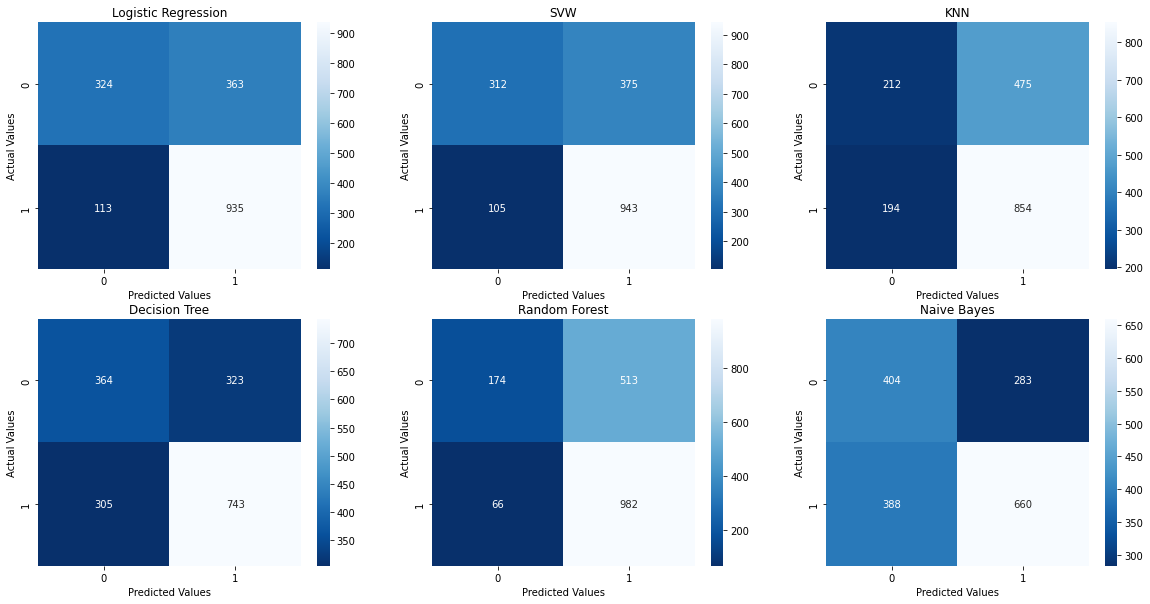

In [47]:
#plot confusion matrix
fig = plt.figure(figsize = ( 20,10))
for i in range( len(cm_PJlist)) :
  cm = cm_PJlist[i]
  model = model_list[i]
  sub = fig.add_subplot(2,3,i+1).set_title(model)
  cm_plot = sns.heatmap(cm,annot=True,cmap = "Blues_r",fmt='g')
  cm_plot.set_xlabel('Predicted Values')
  cm_plot.set_ylabel('Actual Values')

In [48]:
#accuracy and AUC
resultPJ_df = pd.DataFrame({'Model' :model_list,'Accuracy' : acc_PJlist,'AUC' : auc_PJlist})
resultPJ_df

,Model,Accuracy,AUC
0,Logistic Regression,0.725648,0.68
1,SVW,0.723343,0.68
2,KNN,0.614409,0.56
3,Decision Tree,0.638040,0.62
4,Random Forest,0.666282,0.60
5,Naive Bayes,0.613256,0.61
